In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C
from mpl_toolkits.mplot3d import Axes3D
from math import pi
import scipy.spatial as scpspatial
import scipy.stats as stats
import math

import matplotlib.pyplot as plt
from pySOT.surrogate import RBFInterpolant, CubicKernel, LinearTail
from util import *

plt.style.use("bmh")
plt.rcParams["image.cmap"] = "Blues"

from tqdm.notebook import tqdm

train_x = np.array([[1/13,1/6],[1/13,3/8],[1/13,7/12],[1/13,19/24],[1/13,1],
                        [5/13,1/6],[5/13,3/8],[5/13,7/12],[5/13,19/24],[5/13,1],
                        [9/13,1/6],[9/13,3/8],[9/13,7/12],[9/13,19/24],[9/13,1],
                        [1,1/6],[1,3/8],[1,7/12],[1,19/24],[1,1]])

train_y = np.array([0,2,2,1,2,2,5,5,4,4,8,6,7,10,6,6,9,9,8,8])


x1_range = np.linspace(0, 1, 27)
x2_range = np.linspace(0, 1, 97)
X1, X2 = np.meshgrid(x1_range, x2_range)
xs = np.vstack((X1.flatten(), X2.flatten())).transpose(-1, -2)

In [2]:
rbf = RBFInterpolant(
    dim=2, lb=np.array([0,0]), ub=np.array([1,1]), kernel=CubicKernel(), tail=LinearTail(2))

rbf.add_points(train_x,train_y)
fX_pred = rbf.predict(xs)

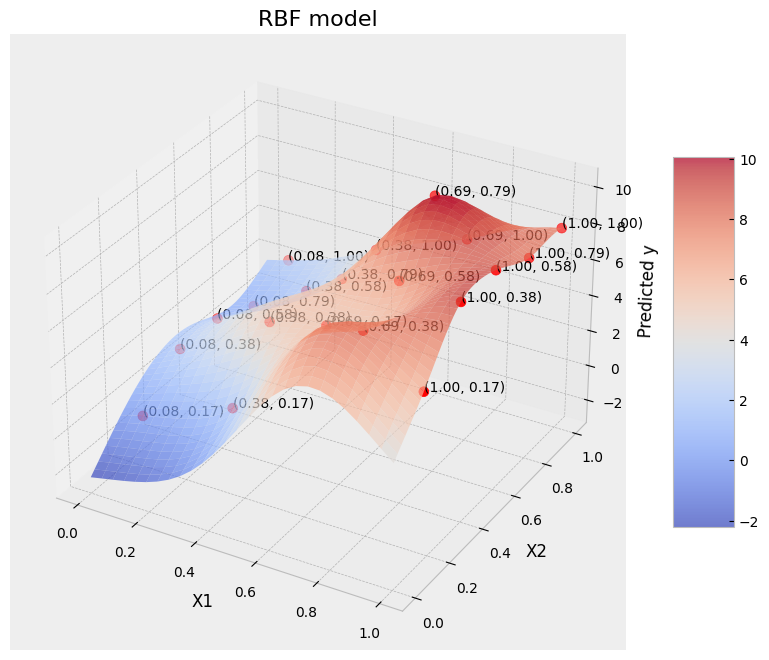

In [3]:
visualize_rbf_belief(fX_pred, train_x, train_y, X1, X2)

In [4]:
weights = np.linspace(0.3,1,20)
suggest_x = weighted_distance_merit(20, rbf, train_x, xs, weights, dtol=1e-3)
suggest_y = rbf.predict(suggest_x)

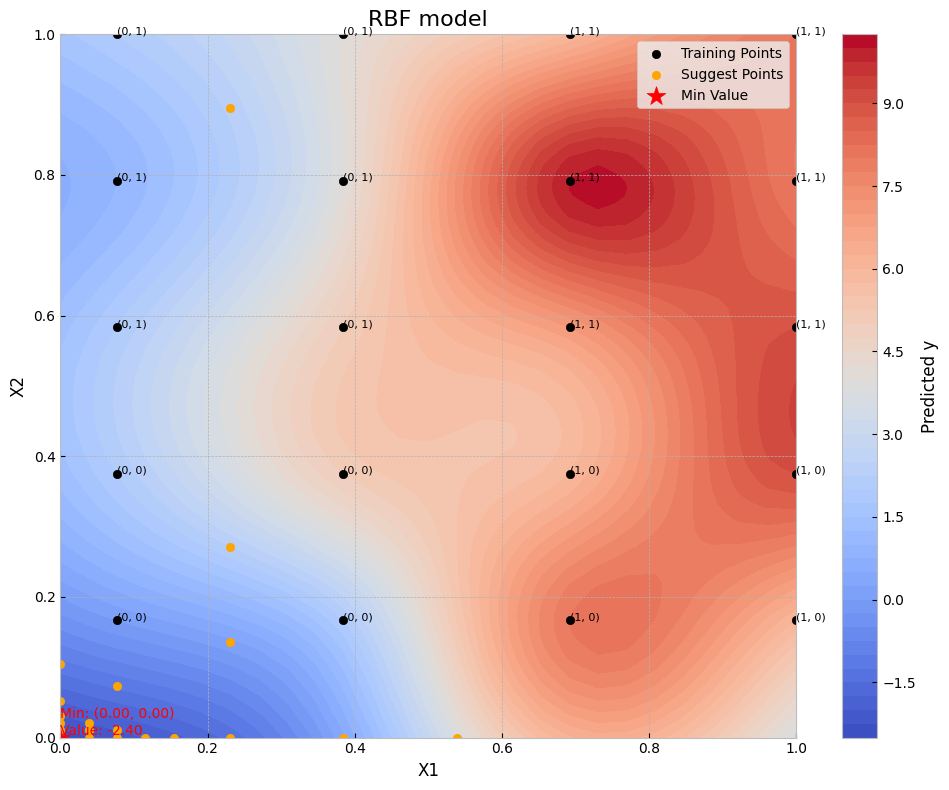

In [5]:
visualize_rbf_contour(fX_pred, train_x, X1, X2, suggest_x)

In [6]:
x1 = suggest_x[:,0]*130+50
x2 = suggest_x[:,1]*2400+100
df = pd.DataFrame({  
    "x1":x1,   
    "x2":x2,
    "predict_y":suggest_y.flatten(),
})
df

,x1,x2,predict_y
0,80.0,100.0,-1.416397
1,50.0,100.0,-2.398030
2,120.0,100.0,3.723485
3,80.0,750.0,2.225478
4,80.0,2250.0,2.321823
5,65.0,100.0,-1.994649
6,100.0,100.0,0.424263
7,80.0,425.0,0.169629
8,50.0,350.0,-1.092438
9,60.0,275.0,-1.206599
